In [2]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_close(names, start, end):
    closes = web.DataReader(names, 'yahoo', start, end)
    return closes['Adj Close'] 

In [4]:
# Descargamos datos...
names = ['AAPL', 'MSFT','GOOG','TSLA']
start = '24/10/2021'
end = '24/10/2022'

precios = get_close(names, start, end)

/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/_utils.py:33: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/_utils.py:37: UserWarning: Parsing '24/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


<AxesSubplot:xlabel='Date'>

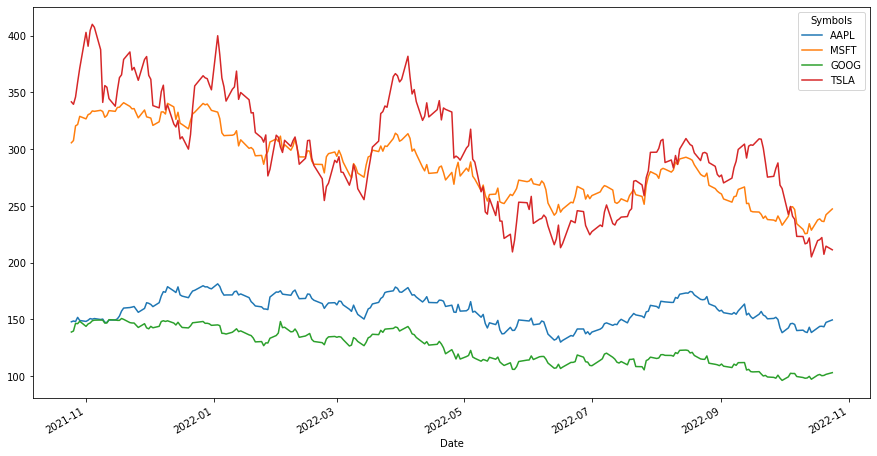

In [5]:
# graficos
precios.plot(figsize=(15,8))

<AxesSubplot:title={'center':'rendimientos log'}, xlabel='Date'>

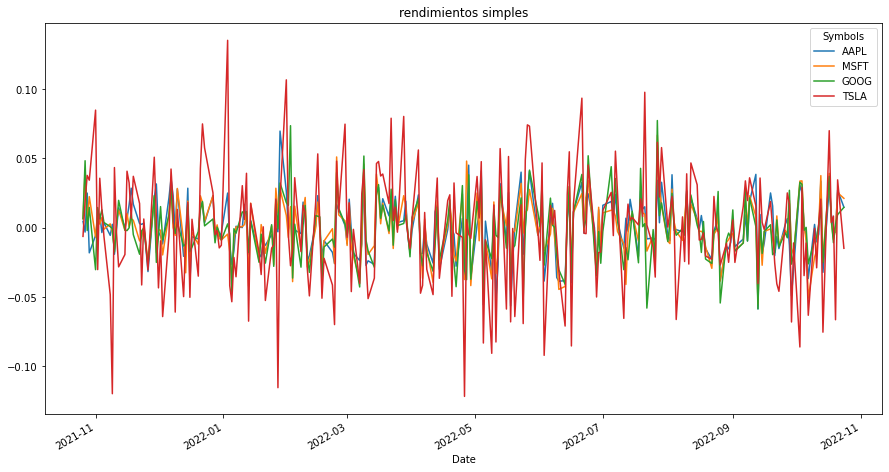

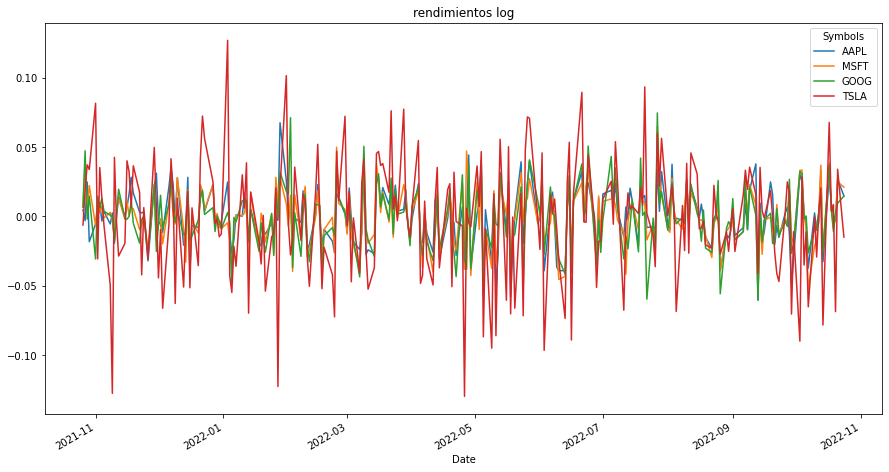

In [6]:
ret = precios.pct_change()
ret.plot(figsize=(15, 8), title = 'rendimientos simples')

ret2 = np.log(precios/precios.shift())
ret2.plot(figsize=(15, 8), title='rendimientos log')

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'GOOG'}>,
        <AxesSubplot:title={'center':'TSLA'}>]], dtype=object)

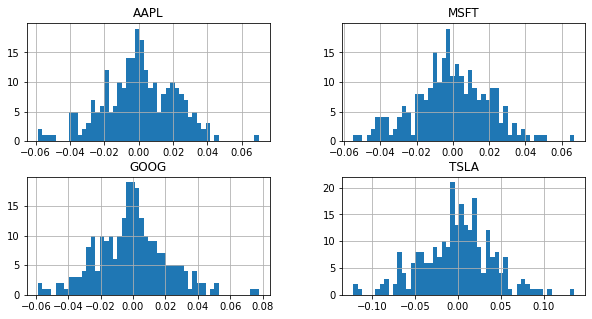

In [7]:
ret.hist(bins=50, figsize=(10,5))

In [9]:
mu_AAPL = ret['AAPL'].mean()
mu_MSFT = ret['MSFT'].mean()
mu_GOOG = ret['GOOG'].mean()
mu_TSLA = ret['TSLA'].mean()

std_AAPL = ret['AAPL'].std()
std_MSFT = ret['MSFT'].std()
std_GOOG = ret['GOOG'].std()
std_TSLA = ret['TSLA'].std()

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,  3.,  5., 10.,  9., 11.,
        18., 16., 16., 18., 32., 40., 41., 41., 56., 55., 51., 47., 55.,
        53., 73., 32., 54., 53., 40., 34., 32., 19., 15., 14.,  8., 11.,
         6.,  8.,  5.,  6.,  4.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.07415517, -0.07124052, -0.06832587, -0.06541123, -0.06249658,
        -0.05958193, -0.05666728, -0.05375264, -0.05083799, -0.04792334,
        -0.04500869, -0.04209405, -0.0391794 , -0.03626475, -0.0333501 ,
        -0.03043546, -0.02752081, -0.02460616, -0.02169151, -0.01877687,
        -0.01586222, -0.01294757, -0.01003292, -0.00711828, -0.00420363,
        -0.00128898,  0.00162567,  0.00454031,  0.00745496,  0.01036961,
         0.01328426,  0.0161989 ,  0.01911355,  0.0220282 ,  0.02494285,
         0.02785749,  0.03077214,  0.03368679,  0.03660144,  0.03951608,
         0.04243073,  0.04534538,  0.04826003,  0.05117467,  0.05408932,
         0.05700397,  0.05991861,  0.06283326,  0.06574791,

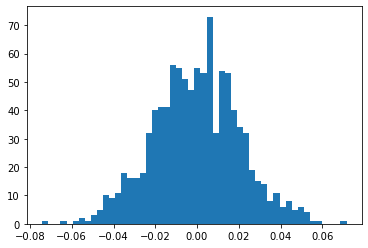

In [15]:
N = 1000
plt.hist(std_AAPL * np.random.randn(N)+mu_AAPL, bins=50)

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  2.,  3.,  8.,  7.,  9.,
        11., 14., 10., 29., 33., 22., 33., 40., 41., 49., 55., 51., 51.,
        59., 44., 55., 47., 51., 47., 27., 37., 28., 18., 29., 17., 17.,
        12.,  6., 10., 10.,  5.,  2.,  2.,  1.,  1.,  1.,  1.]),
 array([-7.51036005e-02, -7.23201425e-02, -6.95366846e-02, -6.67532266e-02,
        -6.39697687e-02, -6.11863107e-02, -5.84028528e-02, -5.56193948e-02,
        -5.28359369e-02, -5.00524790e-02, -4.72690210e-02, -4.44855631e-02,
        -4.17021051e-02, -3.89186472e-02, -3.61351892e-02, -3.33517313e-02,
        -3.05682733e-02, -2.77848154e-02, -2.50013575e-02, -2.22178995e-02,
        -1.94344416e-02, -1.66509836e-02, -1.38675257e-02, -1.10840677e-02,
        -8.30060979e-03, -5.51715184e-03, -2.73369390e-03,  4.97640476e-05,
         2.83322199e-03,  5.61667994e-03,  8.40013788e-03,  1.11835958e-02,
         1.39670538e-02,  1.67505117e-02,  1.95339697e-02,  2.23174276e-02,
         2.51008855e-02,  2.7884

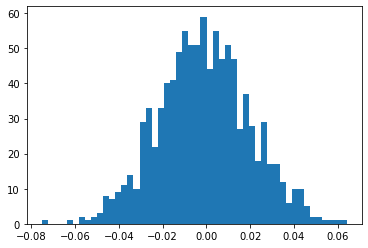

In [16]:
N = 1000
plt.hist(std_MSFT * np.random.randn(N)+mu_MSFT, bins=50)

(array([ 1.,  0.,  1.,  1.,  2.,  2.,  1.,  5.,  5.,  5.,  7., 13.,  7.,
        18., 13., 23., 27., 34., 39., 48., 46., 43., 48., 56., 63., 47.,
        49., 64., 48., 35., 44., 34., 30., 26., 25., 21., 11., 11.,  9.,
         9., 10.,  9.,  1.,  4.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([-7.28675312e-02, -6.99501355e-02, -6.70327398e-02, -6.41153441e-02,
        -6.11979484e-02, -5.82805527e-02, -5.53631570e-02, -5.24457613e-02,
        -4.95283657e-02, -4.66109700e-02, -4.36935743e-02, -4.07761786e-02,
        -3.78587829e-02, -3.49413872e-02, -3.20239915e-02, -2.91065958e-02,
        -2.61892001e-02, -2.32718044e-02, -2.03544087e-02, -1.74370130e-02,
        -1.45196173e-02, -1.16022216e-02, -8.68482592e-03, -5.76743022e-03,
        -2.85003453e-03,  6.73611664e-05,  2.98475686e-03,  5.90215256e-03,
         8.81954825e-03,  1.17369439e-02,  1.46543396e-02,  1.75717353e-02,
         2.04891310e-02,  2.34065267e-02,  2.63239224e-02,  2.92413181e-02,
         3.21587138e-02,  3.5076

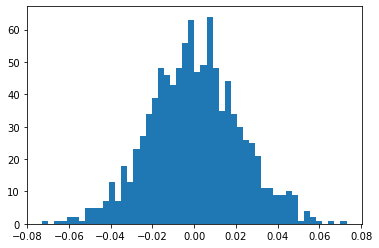

In [17]:
N = 1000
plt.hist(std_GOOG * np.random.randn(N)+mu_GOOG, bins=50)

(array([ 1.,  0.,  0.,  3.,  3.,  3.,  3.,  3.,  0.,  6.,  6., 11.,  8.,
        14., 18., 14., 23., 33., 36., 22., 38., 37., 49., 41., 56., 57.,
        53., 47., 40., 44., 46., 44., 34., 32., 29., 22., 24., 23., 13.,
        10., 13.,  7.,  6.,  2.,  6.,  5.,  6.,  4.,  3.,  2.]),
 array([-0.12845774, -0.12357755, -0.11869737, -0.11381718, -0.108937  ,
        -0.10405681, -0.09917663, -0.09429644, -0.08941626, -0.08453607,
        -0.07965589, -0.0747757 , -0.06989552, -0.06501533, -0.06013515,
        -0.05525496, -0.05037478, -0.04549459, -0.04061441, -0.03573422,
        -0.03085404, -0.02597385, -0.02109367, -0.01621348, -0.0113333 ,
        -0.00645311, -0.00157293,  0.00330726,  0.00818744,  0.01306763,
         0.01794781,  0.022828  ,  0.02770818,  0.03258837,  0.03746855,
         0.04234874,  0.04722892,  0.05210911,  0.05698929,  0.06186948,
         0.06674966,  0.07162985,  0.07651003,  0.08139022,  0.0862704 ,
         0.09115059,  0.09603077,  0.10091096,  0.10579114,

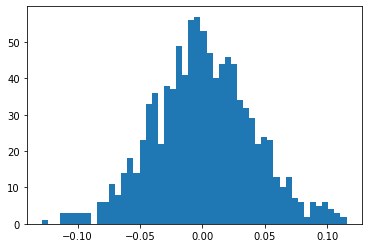

In [18]:
N = 1000
plt.hist(std_TSLA * np.random.randn(N)+mu_TSLA, bins=50)